<b>
<div style="text-align: center;">
    <span style="font-size: 200%;">モンテカルロ法 (Monte Carlo method)</span>
</div><br>
<div style="text-align: center;">
    <span style="font-size: 180%;">～格子世界編～</span>
</div>
</b>

<br>

<b>
<div style="text-align: right;">
    <span style="font-size: 150%;">
        2020/1/11
    </span><br>
    <span style="font-size: 150%;">
        Masaya Mori
    </span>
</div>
</b>

# 目的

<span style="font-size: 120%;"> 格子世界における状態価値をモンテカルロ法によって導出する．</span>

# モンテカルロ法

<span style="font-size: 120%;"> モンテカルロ法とは，乱数を用いた試行(シミュレーション)を繰り返すことにより近似解を求める手法である．より具体的にいえば，シミュレーション対象の現象に対して，その入力に大量の乱数を十分与えて出力値を観測することで，その現象を確率的に解いてみる手法である．文字だけだとわかりにくいと思うので，ここで1つ例を挙げてみることとする．</span>

## モンテカルロ法による円周率・円の面積の導出：理論編

![問題設定：円周率](figure/culculate_pi.jpg)

<span style="font-size: 120%;"> 初めに，正方形の面積$As$と円の面積$Ac$を，
    \begin{align}
        As &= 4 \cdot R^{2}, \\
        Ac &= 4 \cdot a \cdot R^{2}
    \end{align}
とした時，円の面積係数$a$は，
    $$ a = \frac{Ac}{As} $$
となり，正方形の面積と円の面積の比で表現することができる．</span>  

<span style="font-size: 120%;"> 次に，乱数に従うあるプロット$N$が，『円の内側に入った場合の$N_{in}$』と，『円の内側に入らなかった場合の$N_{out}$』を考える．この時，$N_{in}$と$N_{out}$の比は，
    \begin{align}
        N_{in}:N_{out} = Ac : As-Ac
    \end{align}
で表すことができる．</span>  

<span style="font-size: 110%;"> ※これは，仮に円が正方形の面積の8割を占めているとすると，プロットを打った時に円の内側に入る確率は8割で，円の外側になる確率は2割だよねーっと言ってるだけである．ついでに，これはプロット$N$を無限個打った時の関係性だと考えられる．つまり『近似』である．</span>  

<span style="font-size: 120%;">これを展開すると，
    \begin{align}
        N_{out} \cdot Ac &= N_{in} \cdot (As - Ac), \\
        \frac{As - Ac}{Ac} &= \frac{N_{out}}{N_{in}}, \\
        \frac{As}{Ac} - 1 &= \frac{N_{out}}{N_{in}}, \\
        \frac{As}{Ac} &= \frac{N_{in}}{N_{in}} + \frac{N_{out}}{N_{in}}, \\
        \frac{As}{Ac} &= \frac{N_{in}+N_{out}}{N_{in}}, \\
        a &= \frac{N_{in}}{N_{in}+N_{out}}
    \end{align}
</span>  
<span style="font-size: 120%;"> となり，円の面積係数$a$を，円の内側に打たれたプロット数$N_{in}$と全体のプロット数$N$の比で算出(近似)できることがわかる．</span>  

<span style="font-size: 120%;"> したがって円周率$\pi'$と円の面積$Ac$は，
    \begin{align}
        \label{eq:conclusion}
        \pi' &= \frac{4 \cdot N_{in}}{N_{in}+N_{out}} , \\
        Ac &= \pi' \cdot R^{2}
    \end{align}
により，算出可能である．</span>  

<span style="font-size: 120%;"> ついでに，$N_{in}$は[円の方程式](http://www.mathlion.jp/article/ar033.html)を使えば求まるよ! </span>  

## モンテカルロ法による円周率・円の面積の導出：Pythonによる実装編

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
#プロットの数
N = 2000

# 今回は 半径：R=3 とします．
R = 3

# π'の推移グラフの準備
x_axis = np.zeros(N)
y_axis = np.zeros(N)
N_in = np.zeros(N)
N_out = np.zeros(N)
approx_pi = np.zeros(N)

# π'を求めてみよう
for i in range(N):
    x_axis[i] = random.uniform(-R,R) # -R～Rの一様乱数
    y_axis[i] = random.uniform(-R,R) # -R～Rの一様乱数
    N_in[i] = np.count_nonzero(x_axis[0:i+1]**2 + y_axis[0:i+1]**2 <= R**2)
    N_out[i] = np.count_nonzero(x_axis[0:i+1]**2 + y_axis[0:i+1]**2 > R**2)
    approx_pi[i] = 4 * N_in[i] / (N_in[i] + N_out[i])

circle_area = approx_pi[i] * R * R

## モンテカルロ法による円周率・円の面積の導出：結果

円周率：3.142
円の面積：28.278


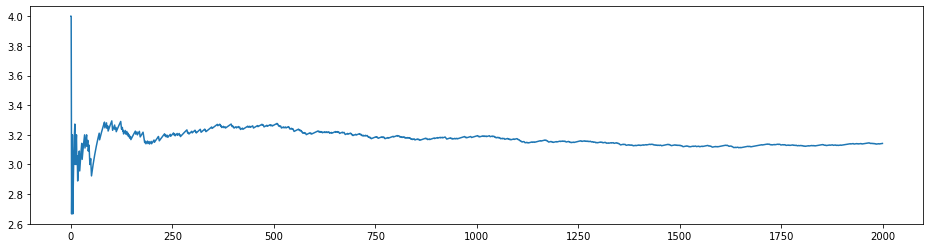

In [18]:
plt.figure(figsize=(16, 4))
plt.plot(approx_pi)
print("円周率：" + str(approx_pi[i]))
print("円の面積：" + str(circle_area))

## 動的計画法とモンテカルロ法の違い

<span style="font-size: 120%;"> 動的計画法は，確率と報酬の総和を用いることで期待値を算出，つまり様々な値を机上計算しているイメージ．</span>  
<span style="font-size: 120%;"> モンテカルロ法は，とりあえず走らせてみることで確率を算出，つまり経験により値を求めているイメージ．</span>  

<span style="font-size: 120%;"> 例：サイコロの出目の期待値 </span>  
<span style="font-size: 120%;"> 動的計画法：サイコロを回すことなく，目が出る確率は全て$\frac{1}{6}$で，報酬は$1～6$なので，期待値$E = \frac{1}{6}\sum^{6}_{i=1}i$により導出する．</span>  
<span style="font-size: 120%;"> モンテカルロ法：確率とか分からないから，とりあえず回してみる．1000回ぐらい回してみる．</span>  

In [14]:
import numpy as np
N = 1000
dice = np.random.randint(1,7,N)
for i in range(6):
    print("Number of {0} :".format(i+1) + np.str(np.sum(dice==(i+1)))+", probability: {0}".format(np.sum(dice==(i+1))/N))

Number of 1 :143, probability: 0.143
Number of 2 :169, probability: 0.169
Number of 3 :158, probability: 0.158
Number of 4 :197, probability: 0.197
Number of 5 :161, probability: 0.161
Number of 6 :172, probability: 0.172


<span style="font-size: 120%;"> 結果から，『1が出る確率は14.3%』『2が出る確率は16.9%』『3が出る確率は15.8%』『4が出る確率は19.7%』『5が出る確率は16.1%』『6が出る確率は17.2%』ということが分かった．したがって，$p_i$を出目$i$が出る確率とすると，期待値は$E = \sum^{6}_{i=1}p_{i} \cdot i$によって導出することができる．</span>  

※ 今回は違いが明確に分かるようにこのような書き方をしたが，特に動的計画法は本来は再帰処理を高速化するためのアルゴリズムのことを指すので，厳密には異なるということを頭に入れておいてほしい．

# 問題設定

<span style="font-size: 120%;"> 今回も格子世界(grid world)を対象に，各状態における状態価値を導出していく．一応，以下に格子世界の画像を記載する．</span>  
※細かい条件や方策などは[状態価値関数(value state function)](https://github.com/rrrrind/reinforcement-learning/blob/master/DP/src/State%20Value%20Function/State_Value_Function.ipynb)を参照して下さい．

![格子世界](figure/ProblemSetting.jpg)

<span style="font-size: 120%;"> モンテカルロ法の使い方としては，とりあえず，ある状態においてエージェントを行動させ，その時の報酬を記録し，それを何回も繰り返す．その後，報酬の平均を取れば，ある状態での状態価値を求めることができるはずである．</span>  

<span style="font-size: 120%;"> 状態価値をモンテカルロ法で求めるには，以下の条件を満たす必要がある．</span>  
1. <span style="font-size: 120%;"> 全ての状態を開始点にとることができる</span>  
1. <span style="font-size: 120%;"> エピソードは必ず終端状態を持つ（無限に続かない）</span>  
1. <span style="font-size: 120%;"> 経験しない枝分かれ状態があってはならない（全ての状態を無限回訪問する）</span>  

<span style="font-size: 120%;"> 1は，25個のどの状態を開始点にしても大丈夫ということである．  
2は，始まりと終わりが必要ということである．格子世界は終わりがないので，今回は100stepで終了とする．  
3は，経験できないような道があってはならないということ．例えば，斜め移動しないといけない場所があるなど．  
</span>  

# Pythonによる実装

In [1]:
# まずは初期化

import numpy as np
import pro_setting # エージェントと格子世界のインポート

epi_num = 100    # 何stepで終わりにするか 
epi_loop = 10000 # サンプリング回数

Gamma = 0.9 # 割引係数 
policy = [0.25, 0.25, 0.25, 0.25] # 方策

# 格子世界の構築
stage = pro_setting.generate_stage()

# エージェントの呼び出し
agent = pro_setting.Agent()

# 各状態における報酬を加算するための配列
reward_holder = np.zeros(len(stage))

# 状態価値を収納する変数
V = np.zeros(len(stage))

# どの位置からスタートするかを予め決めておく
start_pos = np.random.randint(0,len(stage),epi_loop)

In [2]:
# 続いて，状態価値を求める

for _, i in enumerate(start_pos):
    
    # 現在地の入力
    agent.set_pos(stage[i])
    
    # その時のエピソードの行動を決定し，方策へ入力
    episode = np.random.choice(4, size=epi_num, p=policy)
    agent.set_pi(episode)

    # 1時的に報酬を収納する変数
    temp_reward = 0
    
    for j, action in enumerate(episode):
        pre_pos = agent.get_pos()
        agent.move(agent.get_actions()[action])
        temp_reward += (Gamma**j) * agent.reward(pre_pos, agent.get_actions()[action])
    
    reward_holder[i] += temp_reward

for l,reward in enumerate(reward_holder):
    V[l] = reward / np.sum(start_pos==(l))

# 結果

In [3]:
print(V.reshape([5,5]))

[[ 3.40798337  8.86133202  4.11467112  5.26944278  1.21831222]
 [ 1.63798957  3.01529376  2.27476085  1.84752839  0.68198435]
 [ 0.07433482  0.53706787  0.86719038  0.31665867 -0.31588721]
 [-1.03267686 -0.63732349 -0.3341659  -0.71699331 -1.11829457]
 [-1.68558162 -1.33044059 -1.19426797 -1.15167567 -2.13502888]]


<span style="font-size: 120%;"> 結果が正しそうなことが確認できた． </span>

# 参考資料

- [動的計画法（Dynamic Programming）をサルでも分かるように説明する - その１（フィボナッチ数列）](https://www.jabba.cloud/20161020172918/)
- [モンテカルロ法](http://www3.nit.ac.jp/~tamura/tus/ex2/montecarlo.htm)
- [モンテカルロ法のお話](https://unit.aist.go.jp/diversity/ja/jst/teens/montecarlo.htm)
- [思考力を鍛える数学](http://www.mathlion.jp/article/ar033.html)
- [今さら聞けない強化学習（7）：モンテカルロ法で価値推定](https://qiita.com/triwave33/items/0c8833e6b899c26b208e)